# Logistic Regression

In [ ]:
# 2. Logistic Regression
#Purpose: Used to predict a categorical (binary or multi-class) dependent variable.
#Example: Predicting whether a customer will buy a product (yes/no).


## Part 1 - Data Preprocessing

### Importing the dataset

In [35]:
import pandas as pd
dataset = pd.read_csv('adult.csv')

In [36]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [38]:
dataset = dataset.drop(columns=["education"])
dataset = dataset.drop(columns=["fnlwgt"])

In [39]:
# Now, we perform label encoding to change the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'race' column
dataset['workclass'] = label_encoder.fit_transform(dataset['workclass'])

dataset['marital.status'] = label_encoder.fit_transform(dataset['marital.status'])

dataset['occupation'] = label_encoder.fit_transform(dataset['occupation'])

dataset['relationship'] = label_encoder.fit_transform(dataset['relationship'])

dataset['race'] = label_encoder.fit_transform(dataset['race'])

dataset['native.country'] = label_encoder.fit_transform(dataset['native.country'])

dataset['income'] = label_encoder.fit_transform(dataset['income'])

dataset['sex'] = label_encoder.fit_transform(dataset['sex'])

# Display the updated DataFrame
dataset.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,10,5,10,3,4,0,0,3900,40,39,0
5,34,4,9,0,8,4,4,0,0,3770,45,39,0
6,38,4,6,5,1,4,4,1,0,3770,40,39,0
7,74,7,16,4,10,2,4,0,0,3683,20,39,1
8,68,1,9,0,10,1,4,0,0,3683,40,39,0
9,41,4,10,4,3,4,4,1,0,3004,60,0,1


In [40]:
# Transfer the dependent variable 'sex' to the last column
sex_column = dataset.pop('sex') 
dataset['sex'] = sex_column
dataset.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income,sex
0,90,0,9,6,0,1,4,0,4356,40,39,0,0
1,82,4,9,6,4,1,4,0,4356,18,39,0,0
2,66,0,10,6,0,4,2,0,4356,40,39,0,0
3,54,4,4,0,7,4,4,0,3900,40,39,0,0
4,41,4,10,5,10,3,4,0,3900,40,39,0,0


### Getting the inputs and output

In [41]:
X = dataset.iloc[:,:-1].values    # [:,1:-1] -- : means lahat ng row ay included then 1:-1 means yung pang unang column (1:) at last column (:-1) ay hindi included. Mula 2nd up to the 2nd to the last lang ang column na included
y = dataset.iloc[:,-1].values                  # .values -- This converts the selected data into a NumPy array.

In [42]:
X

array([[90,  0,  9, ..., 40, 39,  0],
       [82,  4,  9, ..., 18, 39,  0],
       [66,  0, 10, ..., 40, 39,  0],
       ...,
       [40,  4,  9, ..., 40, 39,  1],
       [58,  4,  9, ..., 40, 39,  0],
       [22,  4,  9, ..., 20, 39,  0]], dtype=int64)

In [43]:
y

array([0, 0, 0, ..., 1, 0, 1])

### Creating the Training Set and the Test Set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [45]:
X_train

array([[41,  4, 10, ..., 51, 39,  0],
       [25,  2, 13, ..., 25, 39,  0],
       [25,  4,  9, ..., 40, 39,  0],
       ...,
       [26,  4,  8, ..., 51, 39,  0],
       [44,  4, 14, ..., 40, 39,  1],
       [39,  4,  9, ..., 40, 39,  1]], dtype=int64)

In [46]:
X_test

array([[56,  4,  5, ..., 40, 39,  0],
       [19,  4,  9, ..., 25, 39,  0],
       [23,  4, 10, ..., 35, 40,  0],
       ...,
       [31,  4, 11, ..., 40, 39,  0],
       [41,  4,  6, ..., 40, 39,  0],
       [37,  4, 13, ..., 40, 39,  0]], dtype=int64)

In [13]:
y_train

array([1, 1, 0, ..., 1, 1, 1])

In [14]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler        #StandardScaler is used to standardize features by removing the mean and scaling them to unit variance
sc = StandardScaler()                                   
X_train = sc.fit_transform(X_train)                     #Fit the scaler on the data and transform it

In [16]:
X_train

array([[ 0.17780667,  0.0881075 ,  0.17324388, ...,  0.85163208,
         0.2922993 , -0.56446347],
       [-0.99324468, -1.28246536,  0.01823791, ..., -1.2548683 ,
         0.2922993 , -0.56446347],
       [-0.99324468,  0.0881075 , -0.09236999, ..., -0.03957962,
         0.2922993 , -0.56446347],
       ...,
       [-0.92005397,  0.0881075 , -1.30388022, ...,  0.85163208,
         0.2922993 , -0.56446347],
       [ 0.39737879,  0.0881075 , -0.70533743, ..., -0.03957962,
         0.2922993 ,  1.77159382],
       [ 0.03142525,  0.0881075 ,  0.32628501, ..., -0.03957962,
         0.2922993 ,  1.77159382]])

## Part 2 - Building and training the model

### Building the model

In [17]:
from sklearn.linear_model import LogisticRegression #used to implement logistic regression for classification tasks. This model is widely used when you want to predict a binary outcome (e.g., yes/no, 0/1, pass/fail) or even multi-class outcomes.
model = LogisticRegression(random_state=0)

### Training the model

In [18]:
model.fit(X_train, y_train)     #  is used to train a machine learning model on your dataset

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [19]:
y_pred = model.predict(sc.transform(X_test))    #used to make predictions on a test dataset after applying the same scaling that was used during training

In [20]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

Making the prediction of a single data point with:

1. Age = 1
2. Workclass = 2
3. Final Weight = 3
4. Education number = 4
5. Marital Status = 5
6. Occupation = 6
7. Relationship = 7
8. Race = 8
9. Capital gain = 9
10. Capital loss = 10
11. Hours per week = 11
12. Native country = 12
13. Income = 13

In [21]:
model.predict(sc.transform([[1,1,2,1,1,1,1,1,1,2,2,2,2]]))

array([1])

## Part 3: Evaluating the model 

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix          #condfusion matrix - used to evaluate the performance of a classification model by comparing the predicted labels to the actual labels
cm = confusion_matrix(y_test, y_pred)                      #This function compares the true labels (y_test) and the predicted labels (y_pred) and returns a confusion matrix.
cm

array([[1344,  883],
       [ 646, 3640]], dtype=int64)

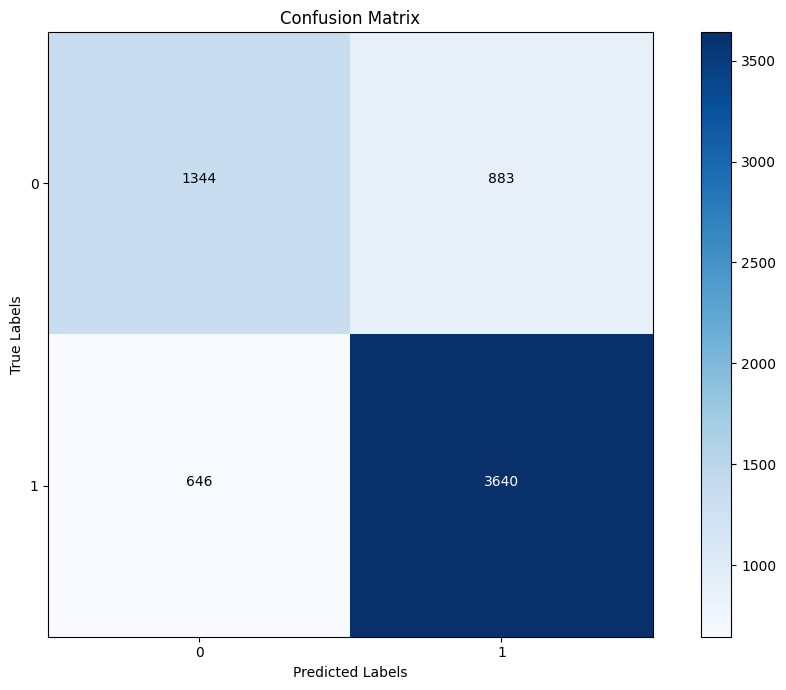

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
plt.figure(figsize=(10, 7))

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Assuming y has the unique labels
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))

# Labeling the axes
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Annotate the cells with numeric values
thresh = cm.max() / 2.  # Threshold for coloring the text
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()


### Accuracy

In [23]:
(1344+3640)/(1344+3640+883+646)

0.7652387532627054

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7652387532627054

In [25]:
X_plot = dataset.iloc[:,:-12].values
X_plot

array([[90,  0],
       [82,  4],
       [66,  0],
       ...,
       [40,  4],
       [58,  4],
       [22,  4]], dtype=int64)

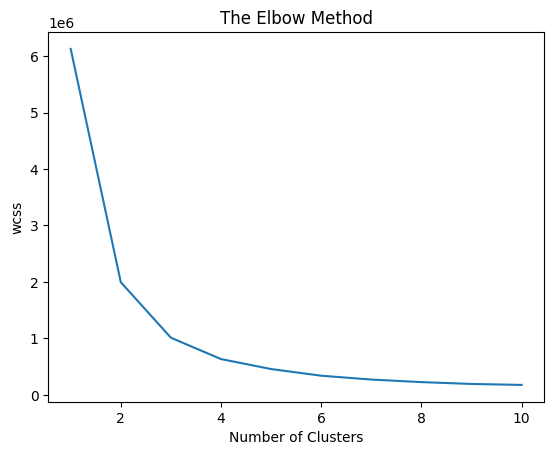

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11): # 1-10 ang need pero 1-11 ang ilalagay
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) 
    kmeans.fit(X_plot)
    wcss.append(kmeans.inertia_) #intertia para di gumalaw pag di ginalaw
plt.plot(range(1,11),wcss)      #gagawa ng table 1-11 for X axis and wcss for Y axis
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show() # para lumabas yung table


In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=1000, random_state = 0) # pinalitan yung i ng 3 dahil 3 ang number of cluster na lumabas sa elbow method
y_plot_pred = kmeans.fit_predict(X_plot)

In [29]:
X_plot

array([[90,  0],
       [82,  4],
       [66,  0],
       ...,
       [40,  4],
       [58,  4],
       [22,  4]], dtype=int64)

In [30]:
y_plot_pred

array([1, 1, 1, ..., 2, 1, 0])

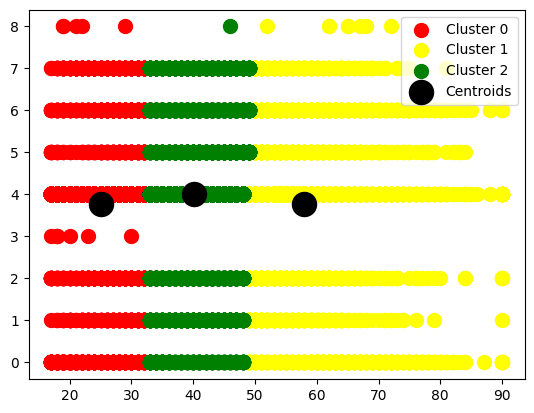

In [31]:
plt.scatter(X_plot[y_plot_pred == 0, 0], X_plot[y_plot_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0') # 0 means x (rows) 1 means y (columns)
plt.scatter(X_plot[y_plot_pred == 1, 0], X_plot[y_plot_pred == 1, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_plot[y_plot_pred == 2, 0], X_plot[y_plot_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroids') # para maplot ang centroids
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()